In [2]:
# Here we'll review how to perform linear regression as an introduction to using Python's numerical library NumPy. 
# To demonstrate, we'll solve regression problems with code we write in NumPy. 
# Becoming comfortable with NumPy opens up a wide range of data analysis techniques and visualization tools.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Numpy arrays are the object central to most operations. These are just matrices and vectors. For example:
A = np.array([[0.1, 2],
             [-4, 1.3]])

b = np.array([[0.2],
              [-1.0]])

In [13]:
# We can perform matrix operations such as multiplying them or solving linear equations.
# A*b
print(np.dot(A, b))
#or similarly
print(A.dot(b))

# Solving Ax=b
A_inv = np.linalg.inv(A)
x = A_inv.dot(b)
print(x)

[[-1.98]
 [-2.1 ]]
[[-1.98]
 [-2.1 ]]
[[0.27798278]
 [0.08610086]]


### Example 1: Linear Regression with Noise

In [ ]:
#generate some data

#We use the random module to access random sampling functions
#https://docs.scipy.org/doc/numpy/reference/routines.random.html
#we uniformly sample 1,000, 2 dimensional values between -5 and 5
#this gives a 1000x2 array of values
X = np.random.uniform(-5,5,(1000,2))

#the true model where the output values are perturbed by noise
#reflective of noisy measurements
alpha = np.array([[3.0], 
              [-1.0]])
Y = X.dot(alpha) + np.random.normal(0,1,size=(1000,1))

The array $X$ is 1000 x 2, 1000 rows of samples, with each of the two columns being a _feature_ of the sample. Each row of $Y$ looks like:
    
<center> $y_{i} = \alpha_{1}x_{i,1} + \alpha_{2}x_{i,2} + \epsilon_i$ </center>

or in matrix notation

<center> $Y = Xw + \epsilon$ </center>

and the goal of linear regression is to use the data samples of inputs $X$ and outputs $Y$ to determine the true value of $\alpha = \langle \alpha_1, \alpha_2 \rangle$ with the assumption that the outputs $Y$ are a linear function of the data features $X$. We can look at the data we've generated:

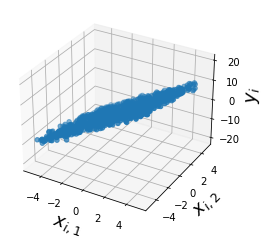

In [4]:
#using matplot lib we scatter plot y_i as a function of x_i,1, x_i,2
from mpl_toolkits.mplot3d import Axes3D #import this so we can plot 3D data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#notice below when we use ":" it allows us to select all the elements along that dimension of the array
ax.scatter(X[:,0], X[:,1], Y[:,])
ax.set_xlabel("$x_{i,1}$", fontsize=18)
ax.set_ylabel("$x_{i,2}$", fontsize=18)
ax.set_zlabel('$y_{i}$', fontsize=18)
plt.show()

This looks a lot like a plane, so we'll assume the outputs were generated by a linear function; or that the system has a linear basis. We'll define the _loss function_ to be squared error, and minimize that loss to find the line of best fit. In other words, we're going to estimate the coefficients of the linear function, $\alpha$ with a vector $\omega$ that gives us the best fit so that $\hat{Y} = X\omega$. Recall that $\hat{Y}$ is our model's guess what $Y$ should be. The error,

<center> $\mathcal{L}(Y, \hat{Y}) = \sum_{i} (y_i - x_{i}\omega_{i})^{2}$ </center>

Alternatively we can write this in matrix notation where $||\cdot||_{2}$ is the 2-norm, or the magnitude of a vector,

<center> $\mathcal{L}(Y, \hat{Y}) = ||Y - X\omega||_{2}^{2}$ </center>

When the samples are vectorized, the sum of squares can be rewritten as,

<center> $\mathcal{L}(Y, \hat{Y}) = (Y - X\omega)^{T}(Y - X\omega)$ </center>
<center> $               = Y^{T}Y - Y^{T}X\omega - (X\omega)^{T}Y + (X\omega)^{T}X\omega$ </center>
<center> $               = Y^{T}Y - Y^{T}X\omega - \omega^{T}X^{T}Y + \omega^{T}X^{T}X\omega$ </center>
<center> $               = Y^{T}Y - 2\omega^{T}X^{T}Y + \omega^{T}X^{T}X\omega$ </center>

Now we'll take the derivative (a gradient vector) of $\mathcal{L}$ with respect to $\omega$:

<center> $\nabla_{\omega} \mathcal{L}(Y, \hat{Y}) = -2X^{T}Y +  2X^{T}X\omega$ </center>

Setting $\mathcal{L} = 0$, we can solve directly for the $\omega$ that minimizes this equation which we can do since the 2-norm is convex and has a unique minimum,

<center> $0 = -2X^{T}Y +  2X^{T}X\omega$ </center>
<center> $\omega = (X^{T}X)^{-1}X^{T}Y$ </center>

Taking all the matrix algebra above as is, notice that the weights $\omega$ that minimize the _loss function_ at the last line is just a multiplication problem based on the input data $X$ and output data $Y$ that we have samples of. Let's compute that multiplication problem.

In [5]:
cov = np.dot(X.T, X) #the first half, X.T is the transpose of numpy array X
cov_i = np.linalg.inv(cov) #take the inverse; count your blessings everytime you compute an inverse
right = np.dot(X.T, Y)
omega = np.dot(cov_i, right)

#we can also compute omega using numpy array's builtint dot product method, like this:

omega = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)  #w = (X^T X)^(-1) X^T Y

In [7]:
#check out omega versus alpha
print(omega)
print("\n")
print(alpha)

[[ 3.00158872]
 [-1.01272482]]


[[ 3.]
 [-1.]]


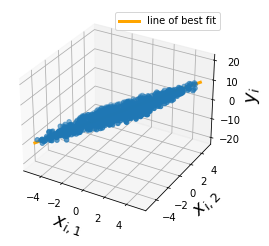

In [8]:
#and we can plot our line of best fit

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_1_ran = np.arange(np.min(X[:,0]), np.max(X[:,1]), 0.1)
x_2_ran = np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.1)
X_ran = np.vstack((x_1_ran, x_2_ran)).T
hat_y = X_ran.dot(omega)  # this is compute the estimate outputs y = Xw

ax.plot(x_1_ran, x_2_ran, hat_y[:,0], color="orange", lw=3, label='line of best fit')
ax.scatter(X[:,0], X[:,1], Y[:,])
ax.set_xlabel("$x_{i,1}$", fontsize=18)
ax.set_ylabel("$x_{i,2}$", fontsize=18)
ax.set_zlabel('$y_{i}$', fontsize=18)
ax.legend()

plt.show()

### Example 2: What can go wrong?

Here we generate the data seen in Fig. 1 and compare it what happens when we attempt to use linear regression on a function that <emph>isn't</emph> linear.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X_poly = np.random.normal(0,1,size=(100,1))                 #generate a bunch of randomly selected X's
Y_poly = 2*np.power(X_poly,2) + np.random.normal(0,1,size=(100,1))  #Y = x^{2} + noise ---- a non linear function of X

X_lin = np.random.normal(0,1,size=(100,1))             #generate a bunch of randomly selected X's
Y_lin = 2*(X_lin) + np.random.normal(0,1,size=(100,1)) #Y = 2x + noise

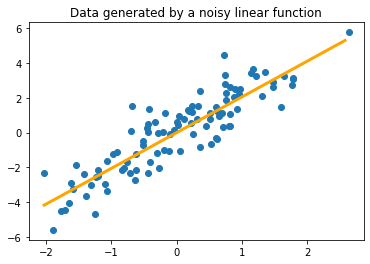

In [11]:
#here we solve for and plot the line of best fit for the linear function data

w = (1.0/np.dot(X_lin.T, X_lin))[0,0]*X_lin.T.dot(Y_lin)[0,0] #closed form OLS solution for single dim

plt.plot(np.arange(np.min(X_lin),np.max(X_lin),0.1), w*np.arange(np.min(X_lin),np.max(X_lin),0.1), color="orange", lw=3)
plt.title("Data generated by a noisy linear function")
plt.scatter(X_lin, Y_lin)
plt.show()

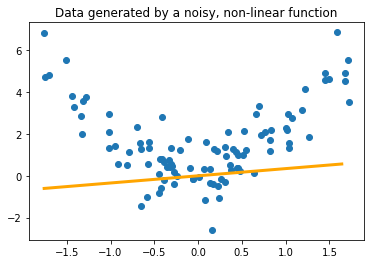

In [12]:
#here we solve for and plot the line of best fit for the non-linear function data

w = (1.0/np.dot(X_poly.T, X_poly))[0,0]*X_poly.T.dot(Y_poly)[0,0]

plt.plot(np.arange(np.min(X_poly),np.max(X_poly),0.1), w*np.arange(np.min(X_poly),np.max(X_poly),0.1), color="orange", lw=3)
plt.title("Data generated by a noisy, non-linear function")
plt.scatter(X_poly,Y_poly)
plt.show()

### Assignment questions

### \#1
In the examples above we used data that are in 1 and 2 dimensions. There is no restriction on the dimension of the data linear regression, except we can't plot high dimensional data to visualize it. So generate some data where $X$ is a three dimensional vector, and repeat example 1. Answer the following question: **how does the fit, i.e., the accuracy of how well you can estimate $\alpha$, depend on the number of samples?** Hint: try generating different number of samples, say 10, 100, 1000, 10000,... and see how well you can fit the the data. 

### \#2
In get a better fit for the data in example 2 by using nonlinear basis. 

### \#3
We've generated some data with an unknown basis function. Your job is to select what you think the basis function is, and learn the appropriate weight to find the line of best fit for the data. Below is some code to load and plot the data to get you started. Looking at the plot, it should be obvious what the basis function is. 

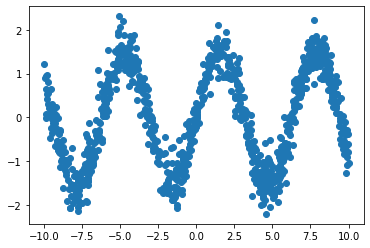

In [16]:
#load the data
import urllib 
link = 'https://www.dropbox.com/s/law99jhp3vs5lfl/homework_1_data.txt?dl=1'
f = urllib.request.urlopen(link)

data = np.loadtxt(f)
X_b = data[:,0]
Y_b = data[:,1]

#plot the data
plt.scatter(X_b, Y_b)
plt.show()